In [1]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [3]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [4]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231007T202743Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEI3//////////wEaCXVzLWVhc3QtMSJIMEYCIQCIPKjCizO9%2BiW7vbp0W4u4xQSmf2tOnIDIwpauuCIjSwIhAK/wslra/1MdEkKwXXB%2BCFxtq48ZxpUGMcMCywHyEuPaKrwFCJX//////////wEQAhoMMzA2MzIwNTAwMjA0Igwo3M12lwIILHWAuRUqkAVzj0XrhVEYaAJAnZ%2B/XGQQ7MNS00XfLGXMDKjMQBsdWLfsVMqS6qItLgbfib31DN9oFrzmnYWr3OrJsT8DqjKFaOGENefcKytn5BZIbLLBFbiBB01J7NdpuTKh1UV3NYhM8bqfglcWtWp1leYFPaPBbt3/AYgFbj1k3Pc4HGs2W9L1yM9EE3xT0u7f5iA1YOk%2B6QWzuG7c9vTiUpzdQpOHTtsOV2Vq8EhTHYj82YFOia8r2K0h2wdnn6TecI1udoVHvRCm16qhNsjChOEHphTCNfcH%2BvKH07L2bi/snuBpyc6JBoxQ1Kupn9PfBI6VWeHMM2Jmrpe8VjJzTyFcTJKuks7JvqXHHpYp96wEZUdLgxpIqYupe//bt7gHzzEKCzKGrndZDm3XWB6DFOAo7h5AABHMha5pQzY/U2oaX%2BG4G2A65nWj3z/GwYYaT7lZga0Kbnp1d7ri/K9maeSL%2Bo2ptCYkCpeBb5Q4iTPSl14z%2BQF1jlJWhUk1doEj1x3E9ThOEXmg%2BWGguleYLk6duSjwGnT/qBN5tBJZ9P%2BC4wP0zyj8kA1EEBnQPnV6Z7OxixOqdbSWqlo3

In [5]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [6]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [7]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [8]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231007T202839Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIz//////////wEaCXVzLWVhc3QtMSJIMEYCIQDpHRDp3xtPESag4CQGzO6nEhd7zqYLZDMmtcBRTBjHIQIhAPJReLchfXXM85JgBEzcTRMY5WuT1Ot0x00lN0bsHwkyKrwFCJX//////////wEQAhoMMzA2MzIwNTAwMjA0IgztEClqVFko102gNy0qkAWmCI9J7f9rNVEZ2mK/tRg%2BbTfz3tT9X6QGYvNWbM2APDdr/91GsF%2BYYRGZA2W0GzGQHy77kDU7q2GrCEX1SEy6PYxBItBHAFFWkRG%2BeBVQ1hf3PJOE4%2BPWsiZR6UY/GttJFm4WBmRrHrr2K0ydNZLmPXzeL4ctafZ9VXkwoU6z9qE1eAvDC1RuP1nG5rC6rNuuY5X6e1cU1X%2BZQfJEnz1emRthRTioPS8iSsVF5wbzwh2bKteRKbEWam%2ByUquVp7huBM2JSUdJok8EAw3LgqgyjPiLbsLX6LycpHLoS8oMea9wQ6hhdifQnXX%2Bm9oZ4M08EZm50CqIQM6k8iIvoBB57PazmFcE74Jg8wCBPbrqnvQGHL/r3AO%2BManZzudJ%2BCP/v8CNhzk86u0csgMxL9cSMIlNHXUjg36fjYh239CQDh5lzTpaBPwdRFYB45xwN8eNupzCrdz8oZ50WYJQfvJHGf/rhQvng5fCom8D2DSyJY0UWIRmh4I8UN6fakpM51Pv/Z8HNvjnehL%2B6Kji3XjnNHBWtu/l1Ev9UU76XDV9n068jb4fro/zFur/5W1Z8qoAzP

In [9]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [10]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [11]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [16]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

MemoryError: Unable to allocate 6.72 GiB for an array with shape (6, 150217961) and data type object

In [13]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [2]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166797,Z4BR,37,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166798,Z4BR,37,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166799,ZCON,37,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota


In [3]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166796,Z4BR,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166797,Z4BR,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166798,Z4BR,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166799,ZCON,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota


In [4]:
#show unique indicators
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)', 'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [5]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [6]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [7]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [8]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,4 bedroom homes,North Dakota,2008
166797,Z4BR,183620,4 bedroom homes,North Dakota,2008
166798,Z4BR,183574,4 bedroom homes,North Dakota,2008
166799,ZCON,173198,condos,North Dakota,2023


In [9]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,183448,4 bedroom homes,North Dakota,2008
150088,Z4BR,183620,4 bedroom homes,North Dakota,2008
150089,Z4BR,183574,4 bedroom homes,North Dakota,2008
150090,ZCON,173198,condos,North Dakota,2023


In [10]:
reduced_df = cleaning_df[cleaning_df['year'] >= 2012]
reduced_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
5,ZCON,164682,condos,Connecticut,2020
6,Z2BR,189335,2 bedroom homes,Connecticut,2020
7,Z1BR,120871,1 bedroom homes,Connecticut,2020
...,...,...,...,...,...
149660,Z4BR,316407,4 bedroom homes,North Dakota,2023
149661,Z4BR,318370,4 bedroom homes,North Dakota,2023
149662,Z4BR,319831,4 bedroom homes,North Dakota,2023
150090,ZCON,173198,condos,North Dakota,2023


In [11]:

reduced_df.dtypes

indicator_id     object
price             int64
property type    object
state            object
year              int64
dtype: object

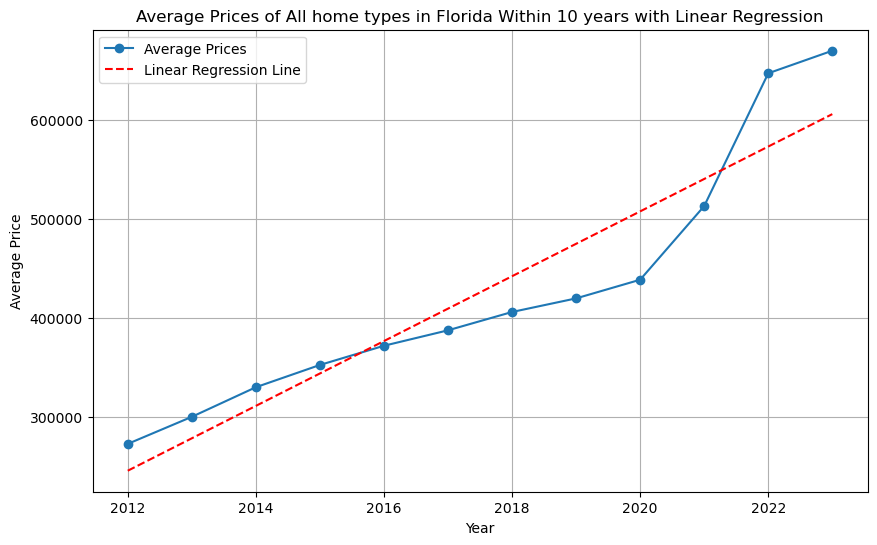

Slope: 32727.49
Intercept: -65602026.54
R-squared: 0.88
P-value: 0.00
Standard Error: 3882.26


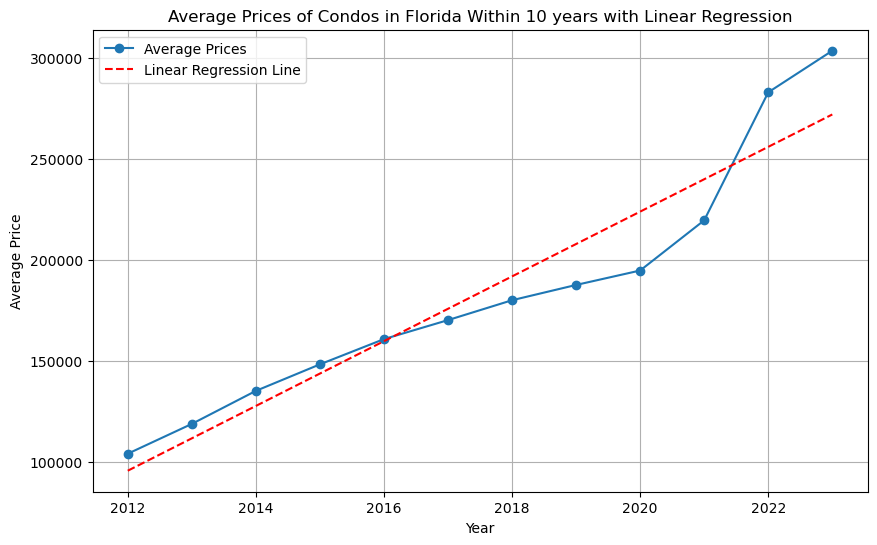

Slope: 16019.90
Intercept: -32136251.62
R-squared: 0.91
P-value: 0.00
Standard Error: 1621.97


In [12]:
# Average Prices of All home types in Florida Within 10 years with Linear Regression
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_1 = flor_df[flor_df['property type'] == 'All home types - top tier']
flor_plot1 = flor_1.groupby('year').mean(numeric_only=True)
mean_prices = flor_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of All home types in Florida Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Average Prices of Condos in Florida Within 10 years with Linear Regression
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_1 = flor_df[flor_df['property type'] == 'condos']
flor_plot1 = flor_1.groupby('year').mean(numeric_only=True)
mean_prices = flor_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in Florida Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

In [49]:
# Using linear regression we can clearly see that over the course of ten years, real estate value has nearly tripled in the state of Florida.

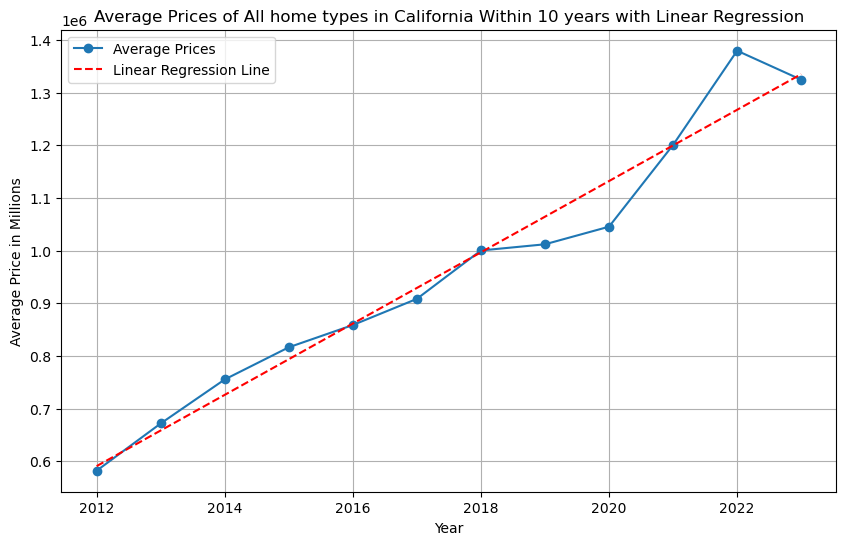

Slope: 67640.41
Intercept: -135501530.58
R-squared: 0.96
P-value: 0.00
Standard Error: 4181.32


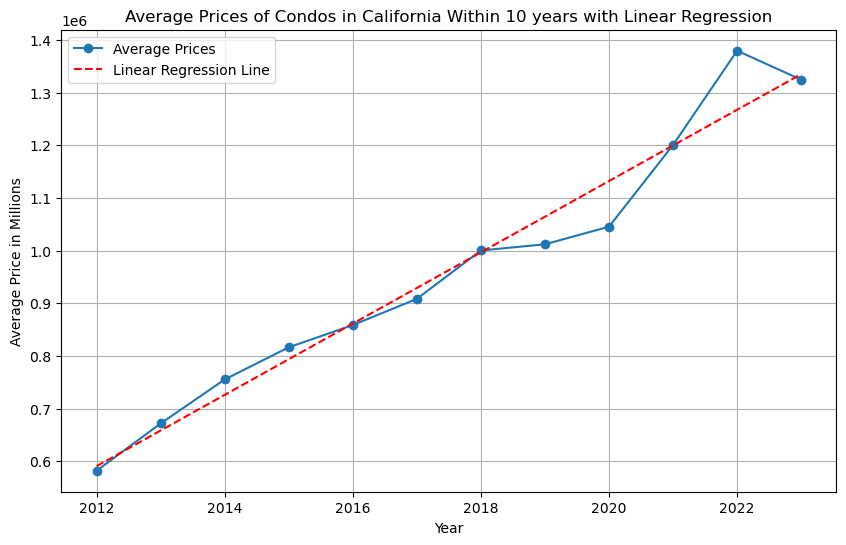

Slope: 67640.41
Intercept: -135501530.58
R-squared: 0.96
P-value: 0.00
Standard Error: 4181.32


In [13]:
# Average Prices of All home types in Atlanta Within 10 years with Linear Regression
Cal_df = reduced_df[reduced_df['state'] == 'California']
Cal_1 = Cal_df[Cal_df['property type'] == 'All home types - top tier']
Cal_plot1 = Cal_1.groupby('year').mean(numeric_only=True)
mean_prices = Cal_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Prices of All home types in California Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Average Prices of Condos in Florida Within 10 years with Linear Regression
Cal_df = reduced_df[reduced_df['state'] == 'California']
Cal_1 = Cal_df[Cal_df['property type'] == 'All home types - top tier']
Cal_plot1 = Cal_1.groupby('year').mean(numeric_only=True)
mean_prices = Cal_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Prices of Condos in California Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


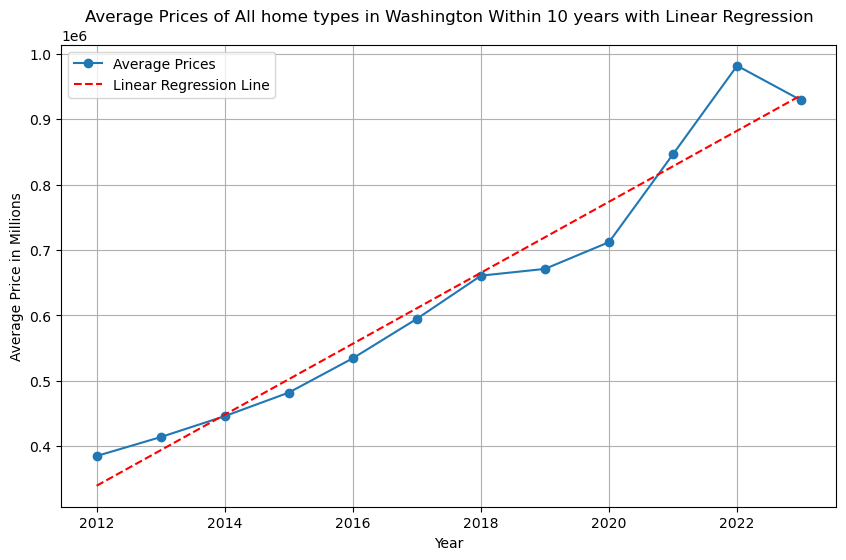

Slope: 54286.10
Intercept: -108884105.41
R-squared: 0.95
P-value: 0.00
Standard Error: 3750.07


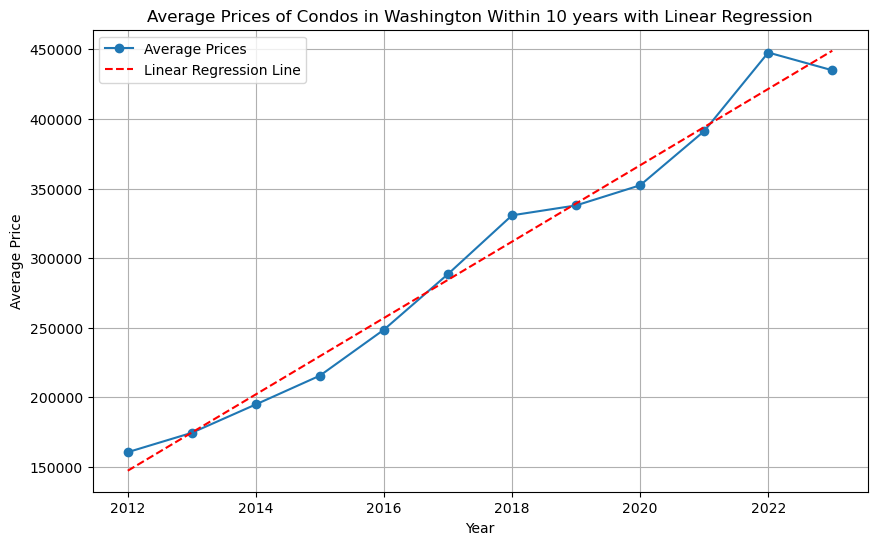

Slope: 27438.00
Intercept: -55058066.87
R-squared: 0.98
P-value: 0.00
Standard Error: 1173.43


In [15]:
# Average Prices of All home types in  Washington Within 10 years with Linear Regression
Wash_df = reduced_df[reduced_df['state'] == 'Washington']
Wash_1 = Wash_df[Wash_df['property type'] == 'All home types - top tier']
Wash_plot1 = Wash_1.groupby('year').mean(numeric_only=True)
mean_prices = Wash_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Prices of All home types in Washington Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


Wash_df = reduced_df[reduced_df['state'] == 'Washington']
Wash_1 = Wash_df[Wash_df['property type'] == 'condos']
Wash_plot1 = Wash_1.groupby('year').mean(numeric_only=True)
mean_prices = Wash_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in Washington Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


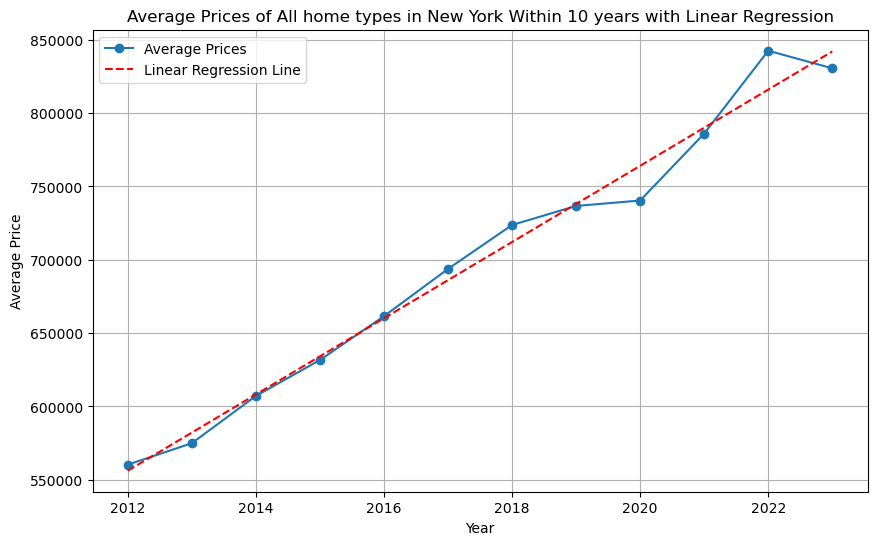

Slope: 25988.35
Intercept: -51732400.82
R-squared: 0.98
P-value: 0.00
Standard Error: 1085.45


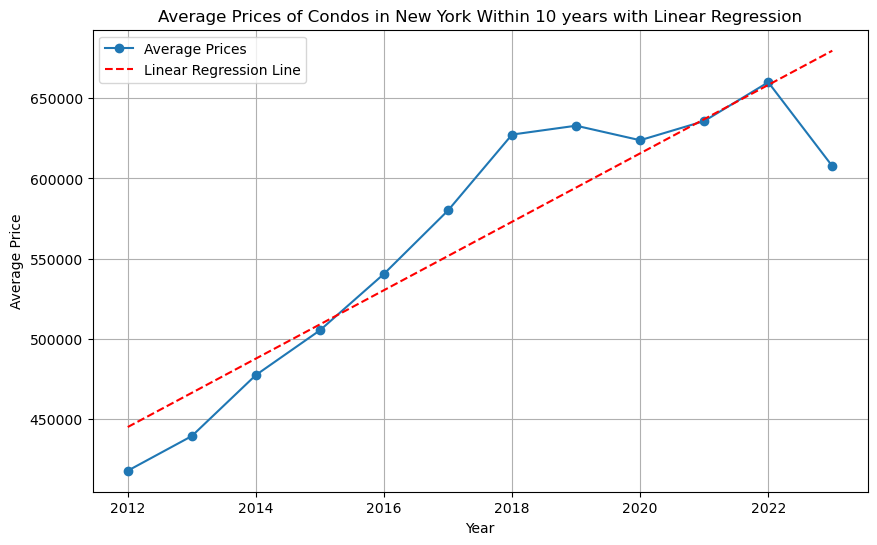

Slope: 21339.40
Intercept: -42489917.94
R-squared: 0.84
P-value: 0.00
Standard Error: 2920.74


In [16]:
# Average Prices of All home types in New York Within 10 years with Linear Regression
NY_df = reduced_df[reduced_df['state'] == 'New York']
NY_1 = NY_df[NY_df['property type'] == 'All home types - top tier']
NY_plot1 = NY_1.groupby('year').mean(numeric_only=True)
mean_prices = NY_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of All home types in New York Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")


# Average Prices of Condos in New York Within 10 years with Linear Regression
NY_df = reduced_df[reduced_df['state'] == 'New York']
NY_1 = NY_df[NY_df['property type'] == 'condos']
NY_plot1 = NY_1.groupby('year').mean(numeric_only=True)
mean_prices = NY_1.groupby('year')['price'].mean()

# Extract the 'year' and 'mean_prices' Series
years = mean_prices.index

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(years, mean_prices)

# Create a regression line
regression_line = slope * years + intercept

# Create the line plot for mean prices
plt.figure(figsize=(10, 6))
plt.plot(years, mean_prices, marker='o', linestyle='-', label='Average Prices')
plt.plot(years, regression_line, color='red', linestyle='--', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Condos in New York Within 10 years with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")
